In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from wordcloud import WordCloud
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

## Data Collection & Preprocessing

In [2]:
Data = pd.read_csv('IMDB Top 1000 Movies.csv')

In [3]:
Data.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [4]:
Data.shape

(1000, 16)

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


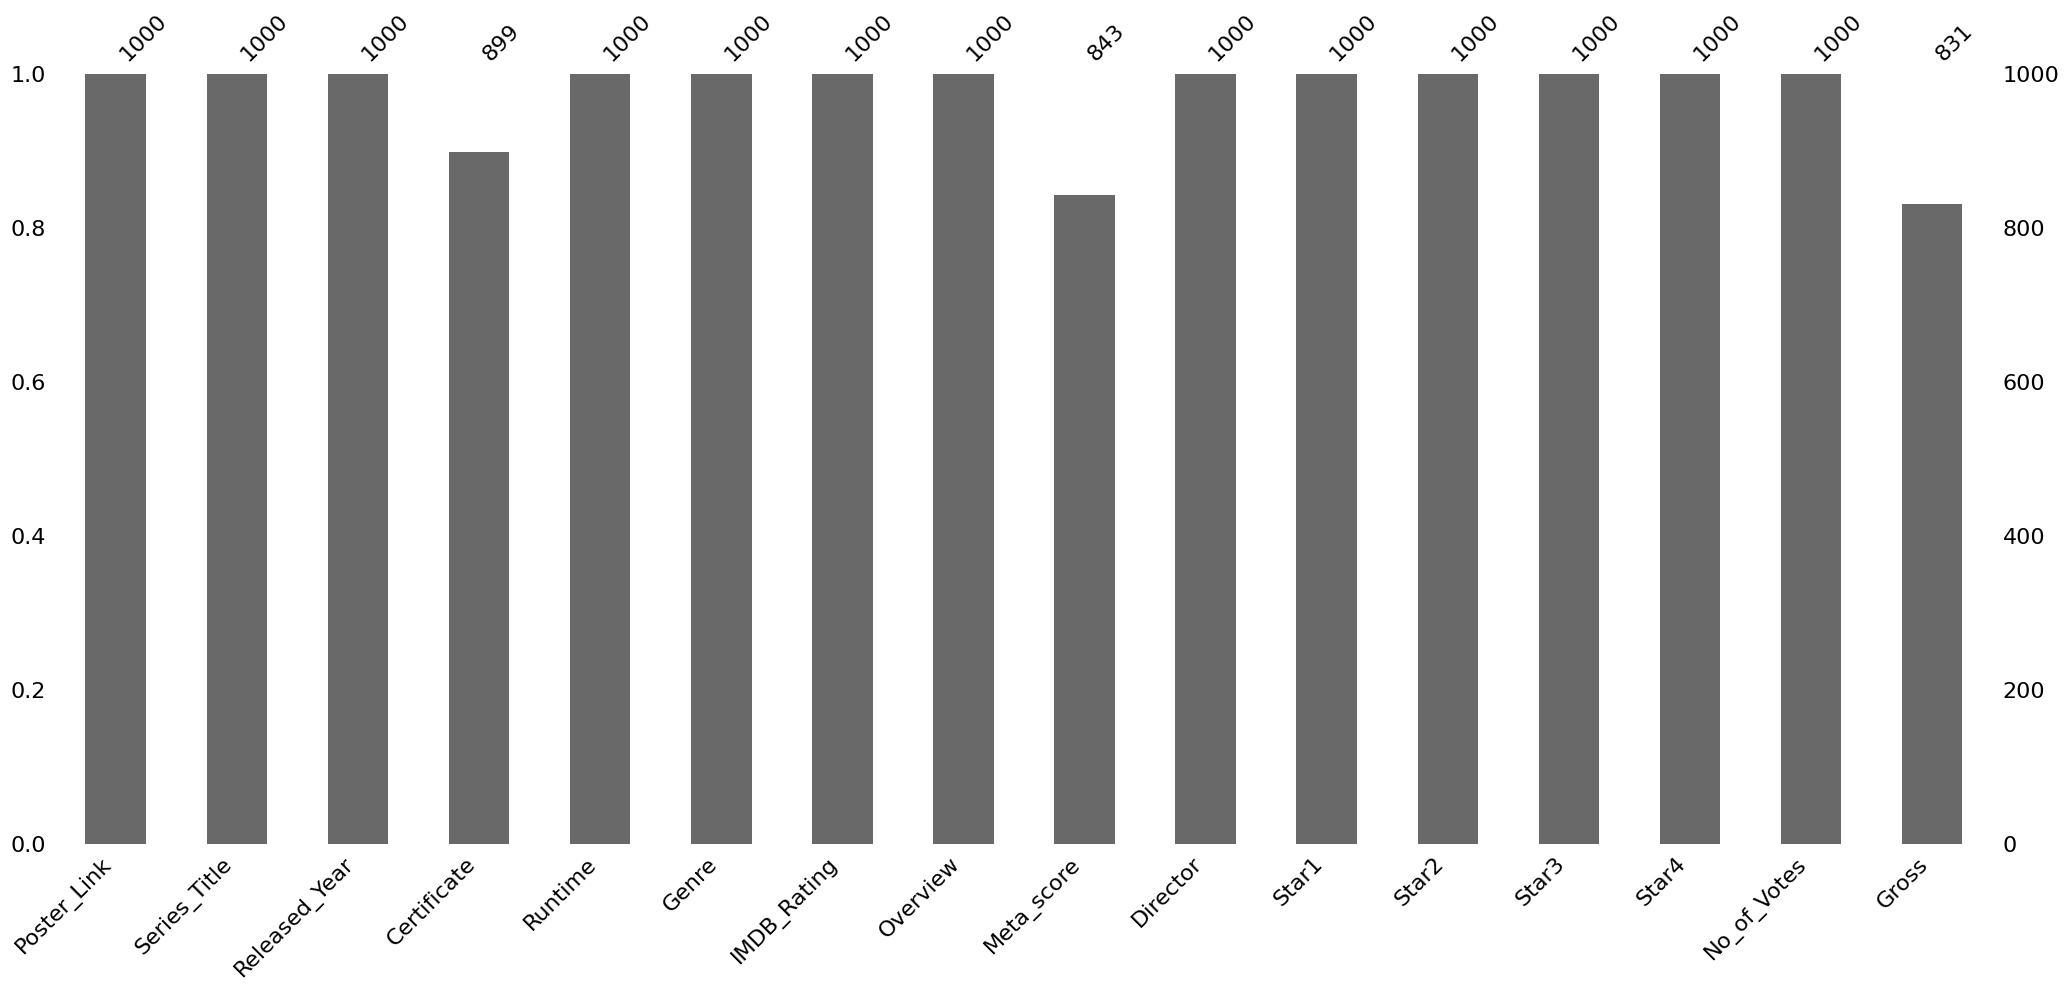

In [6]:
# Display the counts of null values
msno.bar(Data)
plt.show()

In [7]:
# Preprocessing Gross coumln
Data['Gross'] = Data['Gross'].replace(',', '', regex=True)   # removing space and commas
Data['Gross'] = pd.to_numeric(Data['Gross'], errors='coerce')  # converting to numerical values

In [8]:
# Replacing the null values
Data['Certificate'] = Data['Certificate'].fillna(Data['Certificate'].mode()[0])
Data['Meta_score'] = Data['Meta_score'].fillna(Data['Meta_score'].median())
Data['Gross'] = Data['Gross'].fillna(Data['Gross'].median())

In [9]:
# Clean Runtime
Data['Runtime'] = Data['Runtime'].str.replace(" min","").astype(float)


In [10]:
# Convert Released_Year to numeric
Data['Released_Year'] = pd.to_numeric(Data['Released_Year'], errors='coerce')

In [11]:
Data.isnull().sum()

Poster_Link      0
Series_Title     0
Released_Year    1
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

In [12]:
Data.describe()

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,999.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03
mean,1991.217217,122.891000,7.949300,78.133000,2.736929e+05,6.051360e+07
std,23.297025,28.093671,0.275491,11.368225,3.273727e+05,1.014192e+08
min,1920.000000,45.000000,7.600000,28.000000,2.508800e+04,1.305000e+03
25%,1976.000000,103.000000,7.700000,72.000000,5.552625e+04,5.012919e+06
50%,1999.000000,119.000000,7.900000,79.000000,1.385485e+05,2.353089e+07
75%,2009.000000,137.000000,8.100000,85.250000,3.741612e+05,6.153989e+07
max,2020.000000,321.000000,9.300000,100.000000,2.343110e+06,9.366622e+08


## Exploratory Data Analysis(EDA)

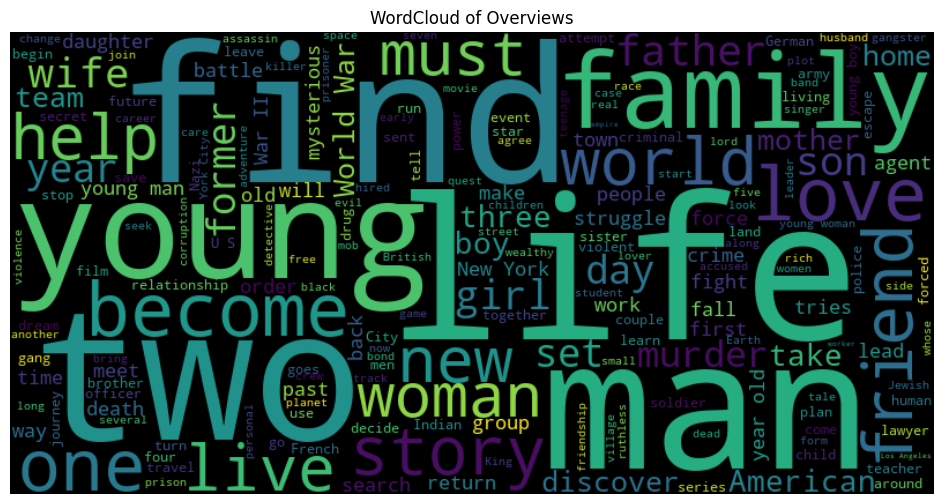

In [13]:
# WordCloud for Overview
text = " ".join(str(i) for i in Data.Overview)
wordcloud = WordCloud(width=800, height=400, background_color="black").generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud of Overviews")
plt.show()

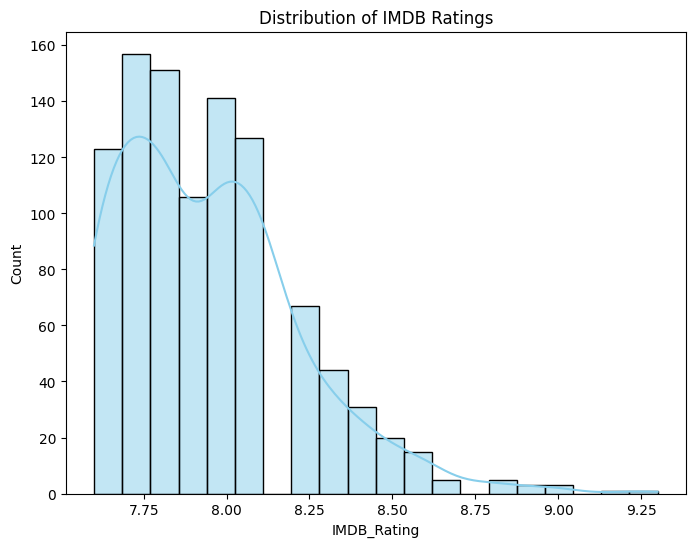

In [14]:
# Distribution of IMDB Ratings
plt.figure(figsize=(8,6))
sns.histplot(Data['IMDB_Rating'],bins=20, kde=True, color="skyblue")
plt.title("Distribution of IMDB Ratings")
plt.show()

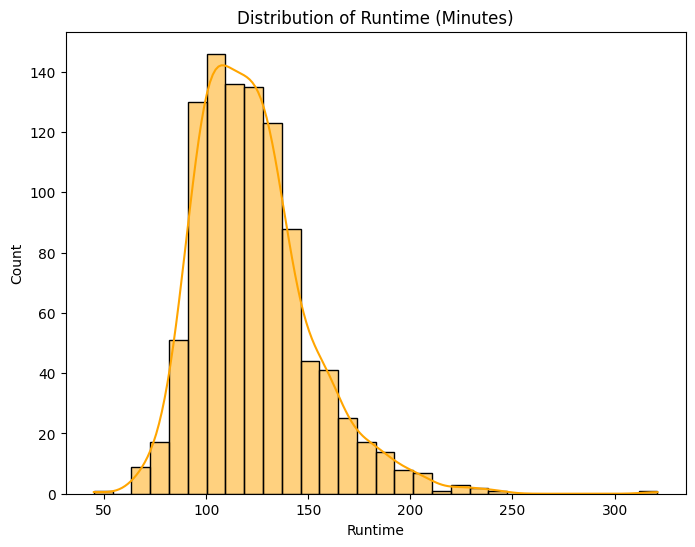

In [15]:
# Runtime Distribution
plt.figure(figsize=(8,6))
sns.histplot(Data['Runtime'], bins=30, kde=True, color="orange")
plt.title("Distribution of Runtime (Minutes)")
plt.show()

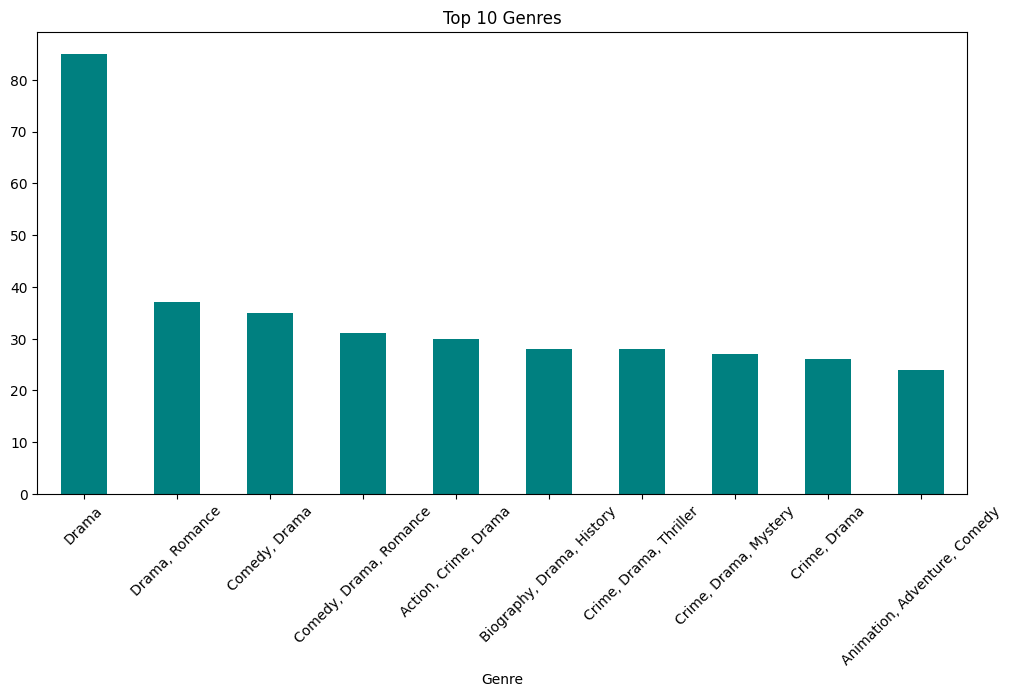

In [16]:
# Top 10 Genres
plt.figure(figsize=(12,6))
Data['Genre'].value_counts().head(10).plot(kind="bar", color="teal")
plt.title("Top 10 Genres")
plt.xticks(rotation=45)
plt.show()

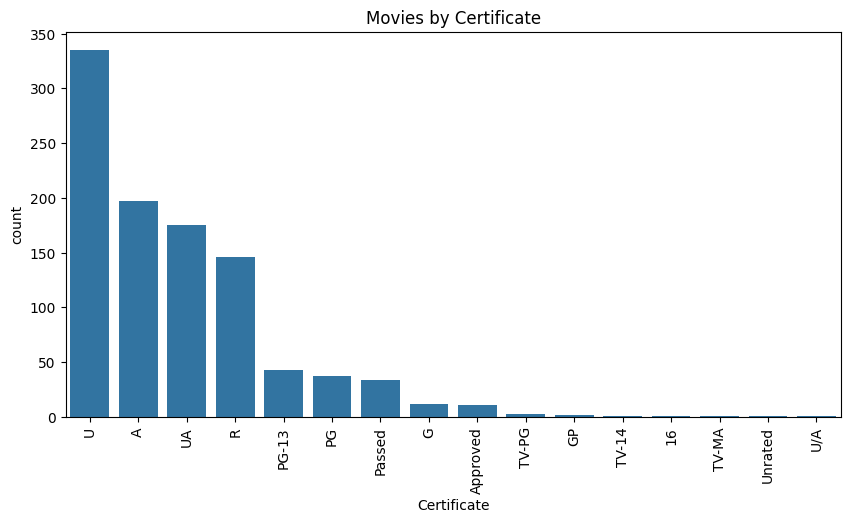

In [17]:
# Certificate Distribution
plt.figure(figsize=(10,5))
sns.countplot(x="Certificate", data=Data, order=Data['Certificate'].value_counts().index)
plt.title("Movies by Certificate")
plt.xticks(rotation=90)
plt.show()

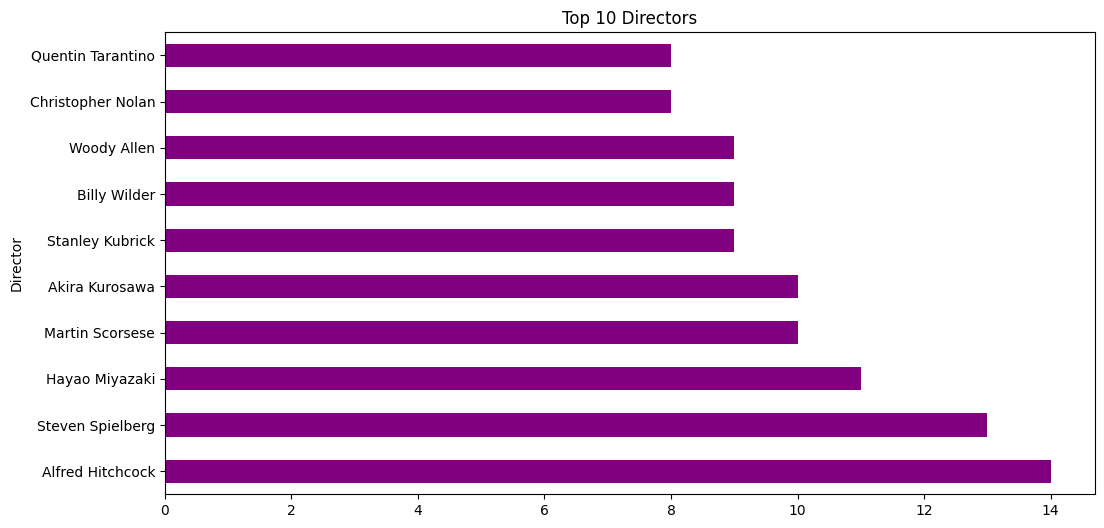

In [18]:
# Top 10 Directors
plt.figure(figsize=(12,6))
Data['Director'].value_counts().head(10).plot(kind="barh", color="purple")
plt.title("Top 10 Directors")
plt.show()

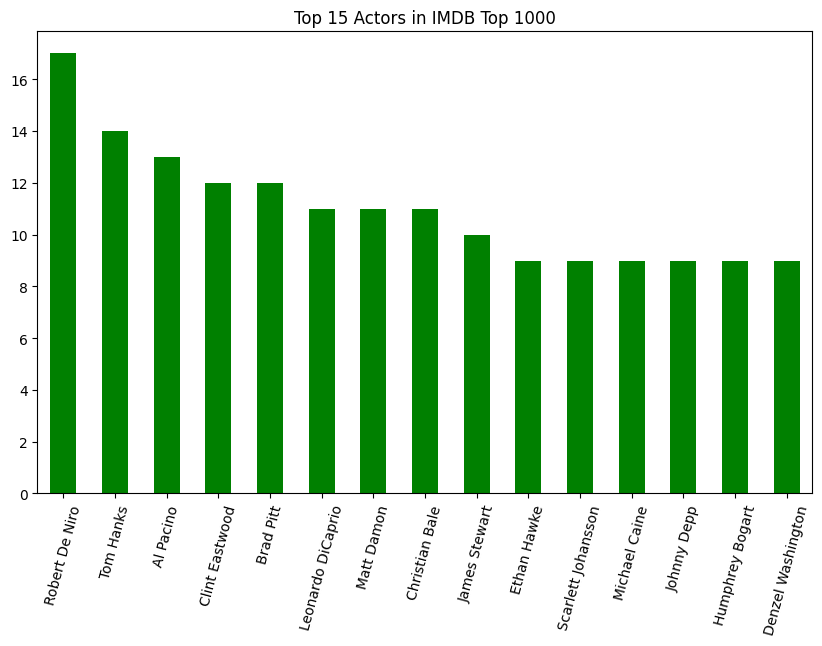

In [19]:
# Top 15 Actors
actors = pd.concat([Data['Star1'], Data['Star2'], Data['Star3'], Data['Star4']])
top_actors = actors.value_counts().head(15)

plt.figure(figsize=(10,6))
top_actors.plot(kind="bar", color="green")
plt.title("Top 15 Actors in IMDB Top 1000")
plt.xticks(rotation=75)
plt.show()

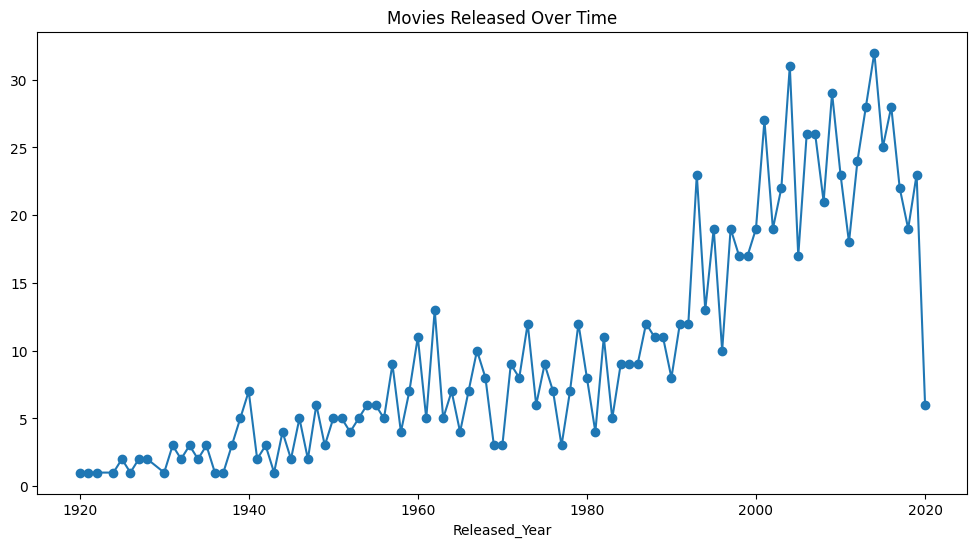

In [20]:
# Movies Released Over Time
plt.figure(figsize=(12,6))
Data['Released_Year'].value_counts().sort_index().plot(kind="line", marker='o')
plt.title("Movies Released Over Time")
plt.show()

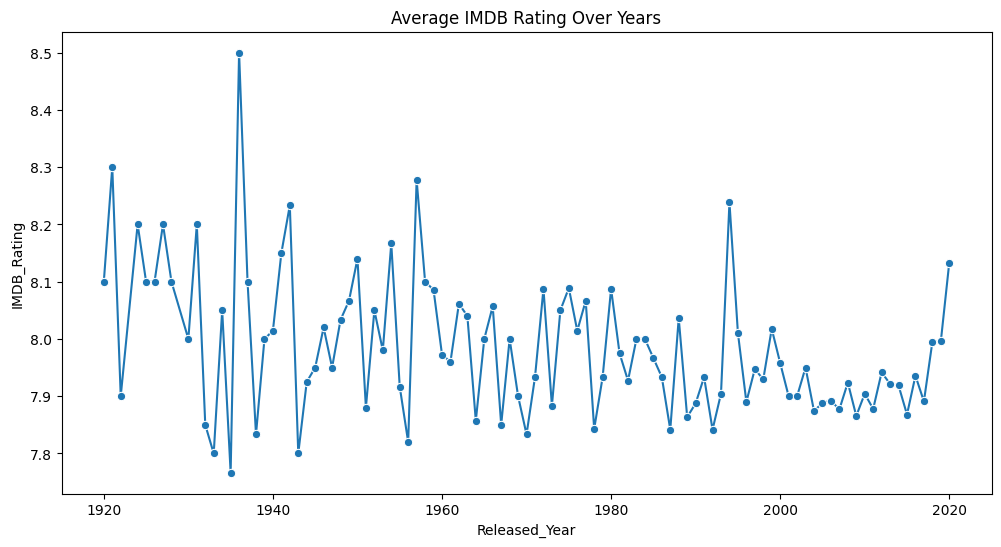

In [21]:
# Average Rating by Year
# Group by year and calculate mean rating
avg_rating = Data.groupby("Released_Year")["IMDB_Rating"].mean().reset_index()

# Sort by year
avg_rating = avg_rating.sort_values("Released_Year")

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(x="Released_Year", y="IMDB_Rating", data=avg_rating, marker="o")
plt.title("Average IMDB Rating Over Years")
plt.show()

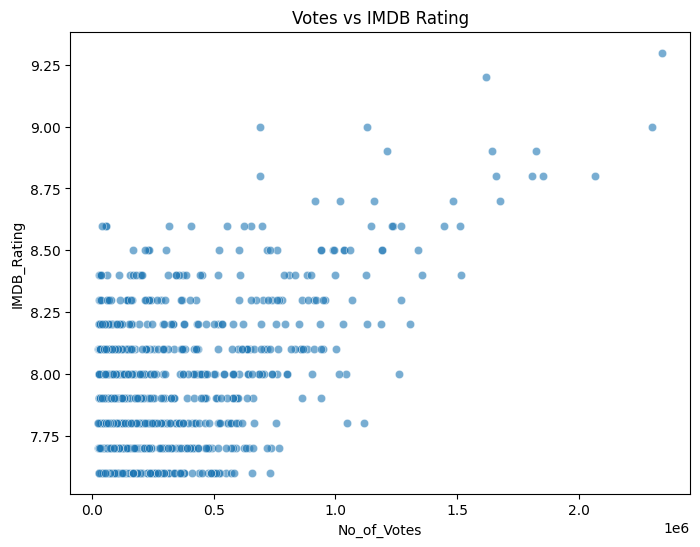

In [22]:
# Votes vs Rating
plt.figure(figsize=(8,6))
sns.scatterplot(x="No_of_Votes", y="IMDB_Rating", data=Data, alpha=0.6)
plt.title("Votes vs IMDB Rating")
plt.show()

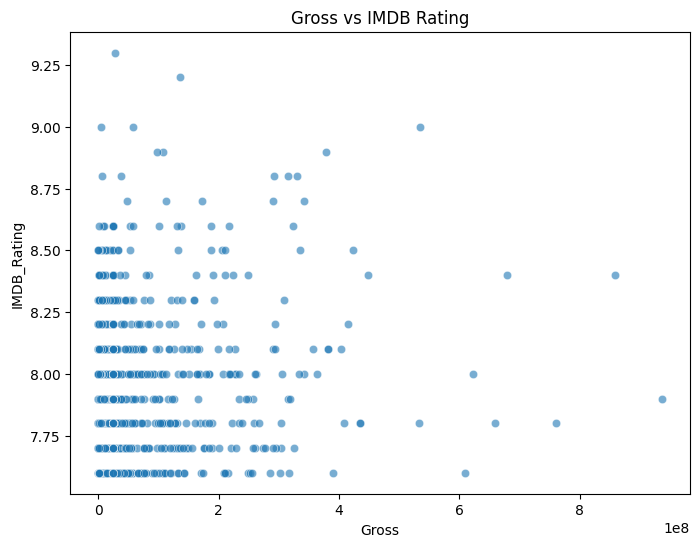

In [23]:
# Gross vs Rating
plt.figure(figsize=(8,6))
sns.scatterplot(x="Gross", y="IMDB_Rating", data=Data, alpha=0.6)
plt.title("Gross vs IMDB Rating")
plt.show()

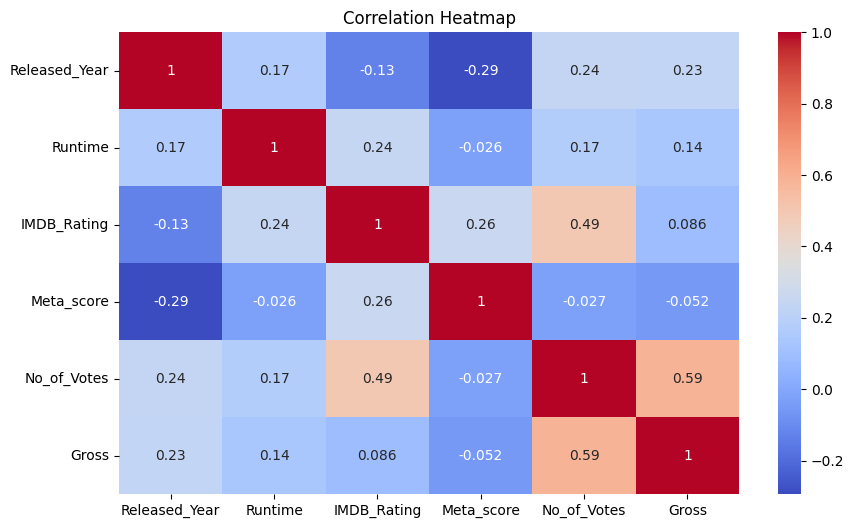

In [24]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(Data.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## Baseline Approach

Before implementing the sophisticated TF-IDF and cosine similarity approach, let's establish a baseline recommendation system. A baseline provides a simple comparison point to evaluate the performance of more advanced methods.

**Baseline Strategy:**
- Recommend movies based on **genre matching** and **high IMDB ratings**
- Simple rule-based approach without machine learning
- Fast and interpretable

In [25]:
def baseline_recommend(movie_name, Data, top_n=10):
    """
    Baseline recommendation system using simple genre matching and IMDB ratings.
    
    This baseline approach:
    1. Finds movies with matching genres
    2. Ranks them by IMDB rating (highest first)
    3. Returns top N recommendations
    
    Parameters:
    -----------
    movie_name : str
        Name of the favourite movie
    Data : pd.DataFrame
        IMDB dataset
    top_n : int
        Number of recommendations to return (default=10)
    
    Returns:
    --------
    pd.DataFrame
        Table of recommended movies with ratings
    """
    
    # Find close match for the movie name
    list_of_all_titles = Data['Series_Title'].tolist()
    find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)
    
    if not find_close_match:
        return pd.DataFrame({"Message": [f"No close match found for '{movie_name}'"]})
    
    close_match = find_close_match[0]
    
    # Get the genre of the input movie
    movie_row = Data[Data['Series_Title'] == close_match].iloc[0]
    input_genres = set(movie_row['Genre'].split(', '))
    
    # Find movies with at least one matching genre
    recommendations = []
    for idx, row in Data.iterrows():
        # Skip the same movie
        if row['Series_Title'] == close_match:
            continue
        
        # Get genres of current movie
        movie_genres = set(row['Genre'].split(', '))
        
        # Check if there's at least one genre in common
        if input_genres.intersection(movie_genres):
            recommendations.append({
                'Suggested_Movie': row['Series_Title'],
                'IMDB_Rating': row['IMDB_Rating'],
                'Genre': row['Genre'],
                'Director': row['Director'],
                'Matching_Genres': ', '.join(input_genres.intersection(movie_genres))
            })
    
    # Convert to DataFrame and sort by IMDB rating (descending)
    recommendations_df = pd.DataFrame(recommendations)
    
    if recommendations_df.empty:
        return pd.DataFrame({"Message": [f"No movies found with matching genres for '{movie_name}'"]})
    
    # Sort by IMDB rating and return top N
    recommendations_df = recommendations_df.sort_values('IMDB_Rating', ascending=False).head(top_n)
    
    return recommendations_df[['Suggested_Movie', 'IMDB_Rating', 'Genre', 'Director', 'Matching_Genres']]

In [26]:
# Test the baseline approach with the same movie
baseline_result = baseline_recommend('The Dark Knight', Data, top_n=10)
print("=" * 80)
print("BASELINE APPROACH RESULTS")
print("=" * 80)
print(baseline_result)

BASELINE APPROACH RESULTS
                                     Suggested_Movie  IMDB_Rating  \
0                           The Shawshank Redemption          9.3   
1                                      The Godfather          9.2   
2                             The Godfather: Part II          9.0   
3                                       12 Angry Men          9.0   
4      The Lord of the Rings: The Return of the King          8.9   
5                                       Pulp Fiction          8.9   
6                                   Schindler's List          8.9   
7                                          Inception          8.8   
8                                         Fight Club          8.8   
9  The Lord of the Rings: The Fellowship of the Ring          8.8   

                       Genre              Director Matching_Genres  
0                      Drama        Frank Darabont           Drama  
1               Crime, Drama  Francis Ford Coppola    Crime, Drama  
2      

**Baseline Approach Summary:**
- Simple and fast (no complex computations)
- Easy to understand and interpret
- Uses genre matching + rating ranking
- Limited to genre overlap (may miss thematic similarities)
- Doesn't consider director, cast, or plot similarities

**Next:** We will implement a more sophisticated approach using TF-IDF and cosine similarity that considers multiple features (genre, overview, director, cast) for better recommendations.

# Building The Recommendation System

In [27]:
# Selecting the relevant features for recommendation
selected_features = ['Series_Title','Genre','Overview','Director','Star1','Star2','Star3','Star4']
print(selected_features)

['Series_Title', 'Genre', 'Overview', 'Director', 'Star1', 'Star2', 'Star3', 'Star4']


In [28]:
# Combining all the 5 selected features
combined_features = Data['Series_Title']+' '+Data['Genre']+' '+Data['Overview']+' '+Data['Director']+' '+Data['Star1']+' '+Data['Star2']+' '+Data['Star3']+' '+Data['Star4']
print(combined_features)

0      The Shawshank Redemption Drama Two imprisoned ...
1      The Godfather Crime, Drama An organized crime ...
2      The Dark Knight Action, Crime, Drama When the ...
3      The Godfather: Part II Crime, Drama The early ...
4      12 Angry Men Crime, Drama A jury holdout attem...
                             ...                        
995    Breakfast at Tiffany's Comedy, Drama, Romance ...
996    Giant Drama, Western Sprawling epic covering t...
997    From Here to Eternity Drama, Romance, War In H...
998    Lifeboat Drama, War Several survivors of a tor...
999    The 39 Steps Crime, Mystery, Thriller A man in...
Length: 1000, dtype: object


In [29]:
# Converting the text data to feature vectors
vectorizer = TfidfVectorizer()
feature_vectors = vectorizer.fit_transform(combined_features)
print(feature_vectors)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 36363 stored elements and shape (1000, 10465)>
  Coords	Values
  (0, 9342)	0.04056762871005125
  (0, 8478)	0.22667726151759143
  (0, 7655)	0.3588537784352223
  (0, 2657)	0.04154875617596127
  (0, 9655)	0.10285304325435742
  (0, 4515)	0.17942688921761116
  (0, 6053)	0.14057417146203618
  (0, 1165)	0.16787486882152636
  (0, 6835)	0.14861428112520378
  (0, 6639)	0.20490214382063243
  (0, 6694)	0.09540779922677486
  (0, 10319)	0.13179105374641303
  (0, 3311)	0.18312702612367343
  (0, 8722)	0.2139396342160808
  (0, 440)	0.05022721575708664
  (0, 3037)	0.22667726151759143
  (0, 9401)	0.14609975112456736
  (0, 181)	0.2139396342160808
  (0, 1874)	0.20490214382063243
  (0, 2290)	0.22667726151759143
  (0, 3455)	0.14861428112520378
  (0, 2219)	0.2139396342160808
  (0, 9419)	0.15595325764116597
  (0, 7930)	0.19789212166450232
  (0, 6286)	0.17611700396754332
  :	:
  (999, 4245)	0.11671077126666342
  (999, 8065)	0.13396134924341754
  (999

In [30]:
# Getting the similarity scores using cosine similarity
similarity = cosine_similarity(feature_vectors)
print(similarity)

[[1.         0.00865157 0.02548445 ... 0.0038971  0.03625864 0.00965447]
 [0.00865157 1.         0.03835746 ... 0.01953415 0.01303079 0.02375224]
 [0.02548445 0.03835746 1.         ... 0.01978103 0.04839229 0.06629547]
 ...
 [0.0038971  0.01953415 0.01978103 ... 1.         0.03917757 0.03360311]
 [0.03625864 0.01303079 0.04839229 ... 0.03917757 1.         0.05770025]
 [0.00965447 0.02375224 0.06629547 ... 0.03360311 0.05770025 1.        ]]


In [31]:
print(similarity.shape)

(1000, 1000)


In [32]:
def recommend_movies(movie_name, Data, similarity, top_n=30):
    """
    Recommend similar movies based on a given movie name.
    
    Parameters:
    -----------
    movie_name : str
        Name of the favourite movie.
    Data : pd.DataFrame
        IMDB dataset with 'Series_Title' column.
    similarity : numpy.ndarray
        Precomputed similarity matrix.
    top_n : int
        Number of recommendations to return (default=30).
    
    Returns:
    --------
    pd.DataFrame
        Table of recommended movies with similarity scores.
    """
    
    # List of all movie titles
    list_of_all_titles = Data['Series_Title'].tolist()
    
    # Find close match
    find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)
    if not find_close_match:
        return pd.DataFrame({"Message": [f"No close match found for '{movie_name}'"]})
    
    close_match = find_close_match[0]
    
    # Index of matched movie
    index_of_the_movie = Data[Data.Series_Title == close_match].index[0]
    
    # Similarity scores
    similarity_score = list(enumerate(similarity[index_of_the_movie]))
    
    # Sort by similarity
    sorted_similar_movies = sorted(similarity_score, key=lambda x: x[1], reverse=True)
    
    # Collect recommendations
    recommendations = []
    for i, (index, score) in enumerate(sorted_similar_movies):
        if i == 0:  # skip the same movie
            continue
        if i >= top_n:
            break
        title_from_index = Data.iloc[index]['Series_Title']
        recommendations.append({
            "Suggested_Movie": title_from_index,
            "Similarity_Score": score
        })
    
    # Convert to DataFrame
    return pd.DataFrame(recommendations)

In [33]:
# Getting the movie name from the user
# movie_name = input(' Enter your favourite movie name : ')

result = recommend_movies('The Dark Knight' , Data, similarity, top_n=10)

print(result)

                                     Suggested_Movie  Similarity_Score
0                                      Batman Begins          0.298494
1                              The Dark Knight Rises          0.292511
2                                       The Prestige          0.152688
3                                 Brokeback Mountain          0.129490
4                                              Joker          0.124263
5  The Lord of the Rings: The Fellowship of the Ring          0.109949
6                       Batman: Mask of the Phantasm          0.100976
7                                        The Fighter          0.100376
8      The Lord of the Rings: The Return of the King          0.096743
